## Topic Modelling

**Topic modelling** - это модель коллекции текстовых документов, которая определяет, к какой теме относится каждый документ коллекции.

На данный момент - это относительно молодая область исследований в теории самообучения.

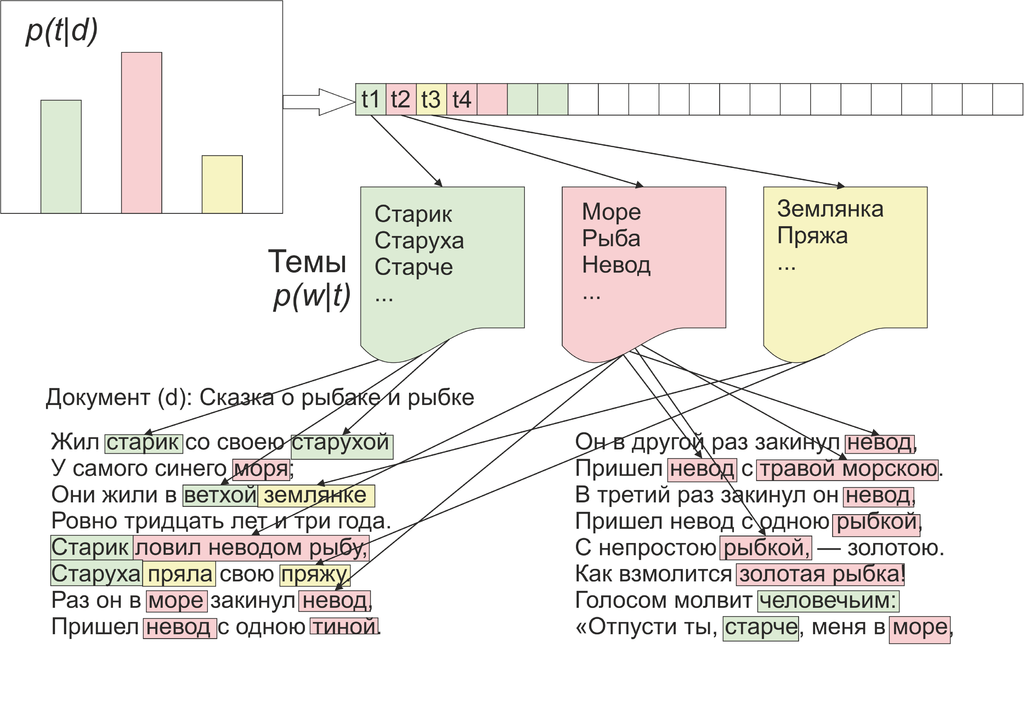

Давайте введем некоторые определения из данной области:

* Тема - специальная терминология предметной области.
* Тема - набор терминов (слов или словосочетаний), совместно часто встречающихся в документах.

Более фомально,

* Тема - условное распределение на множестве терминов, $\mathbb{P}(w | t)$ - вероятность термина $w$ в теме $t$;
* Тематический профиль документа - условное распределение $\mathbb{P}(t | d)$ - вероятность темы $t$ в документе $d$ 

Теперь можем составить **Вероятностную тематическую модель** коллекции документов $D$, которая описывает появление терминов $w$ в документах $d$ темами $t$:

$$\mathbb{P}(w | d) = \sum_t \mathbb{P}(w | t)\mathbb{P}(t|d), d \in D$$

Вероятностные тематические модели основаны на следующих предположения:

* Порядок документов в коллекции не имеет значения
* Порядок слов в документе не имеет значения, документ — мешок слов (**bag of words**)
* Слова, встречающиеся часто в большинстве документов, не важны для определения тематики
* Коллекцию документов можно представить как выборку пар документ-слово $(d, w)$, $d \in D$, $w \in W_d$
* Каждая тема $t \in T$ описывается заранее неизвестным распределением $\mathbb{P}(W | t)$ на множестве слов $w \in W$
* Каждый документ $d \in D$ описывается неизвестным распределением $\mathbb{P}(t | d)$ на множестве тем $t \in T$
* Выполняется гипотеза условной независимости $\mathbb{P}(w | t, d) = \mathbb{P}(w | t)$ 

**Построить тематическую модель** - значит, найти матрицы $\Phi = \|\mathbb{P}(w | t)\|$ и $\Theta = \|\mathbb{P}(t | d)\|$ по коллекции $D$

**Стоп, а зачем это вообще нужно?**
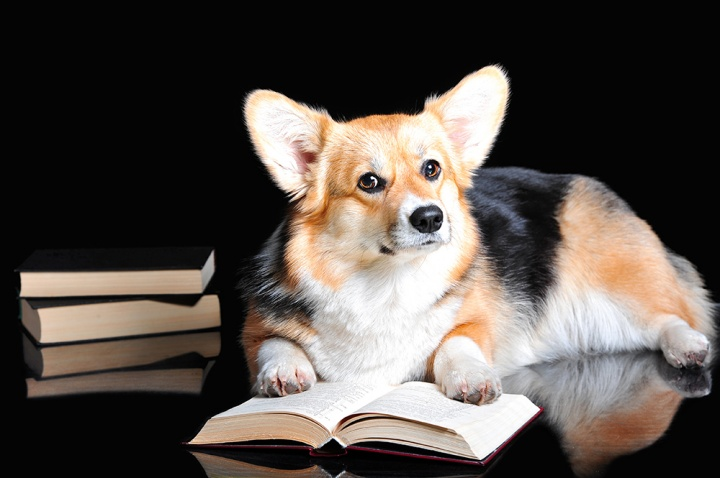

Типичные приложения:

* анализ коллекций научных статей;
* анализ новостных потоков;
* рубрикация коллекций изображений, видео, музыки;
* аннотация генома и другие задачи биоинформатики;
* коллаборативная фильтрация.

## LDA

Существует множество методов Topic Modelling, но мы рассмотрим один из самых известных из них: **Латентное размещение Дирихле (LDA)**, опубликованный в 2003 г.

Вероятностная модель появления пары "документ-слово" может быть записана в следующем виде:

$$\mathbb{P}(d, w) = \sum_{t \in T}\mathbb{P}(d)\mathbb{P}(w | t)\mathbb{P}(t | d)$$

$\mathbb{P}(d)$ - априорное распределение на множестве документов $D$

Причем, выполняются дополнительные предположения:

* Вектора документов $\theta_d = (\mathbb{P}(t | d): t \in T)$ порождаются одним и тем же вероятностным распределением на нормированных $|T|$ - мерных векторах. Это распределение удобно взять из параметрического семейства распределений Дирихле $Dir(\theta, \alpha)$, $\alpha \in \mathbb{R}^{|T|}$.
* Вектора тем $\phi_t = (\mathbb{P}(w | t): w \in W)$ порождаются одним и тем же вероятностным распределением на нормированных векторах размерности $|W|$ . Это распределение удобно взять из параметрического семейства распределения Дирихле $Dir(\theta, \beta)$, $\beta \in \mathbb{R}^{|W|}$


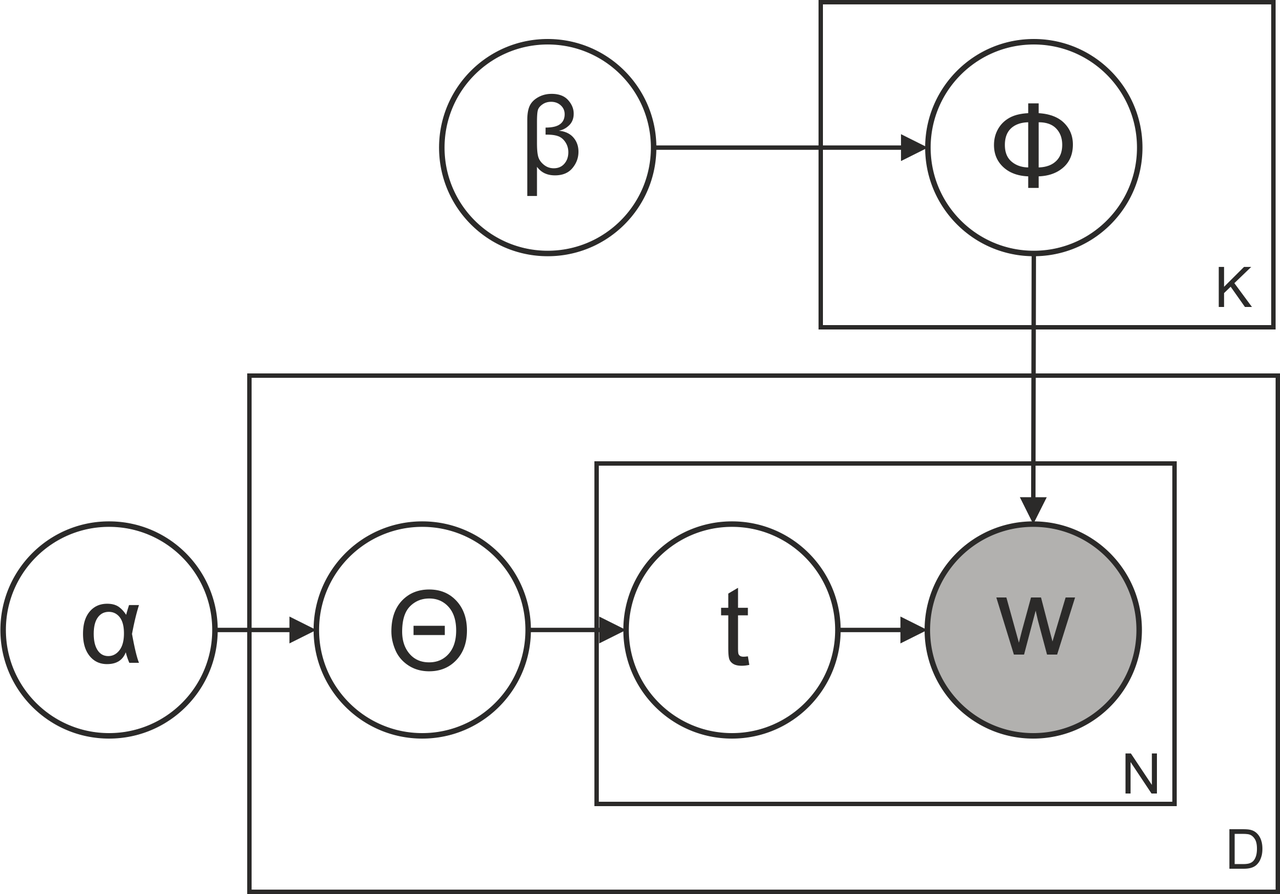

Латентное размещение Дирихле (LDA):

* $w$ - слово (наблюдаемая переменная)
* $t$ - тема (скрытая переменная)
* $D$ - коллекция документов
* $N$ - длина документа в словах
* $K$ - количество тем в коллекции
* $\Theta$ - распределение тем в документе
* $\Phi$ - распределение слов в теме

Важно понимать, что нам нужно либо сопоставить схожим темам один класс, либо сопоставить схожим темам один класте, т. е. мы решаем задачу **классификакции** или **кластеризации**

Немного подытожим картинкой:

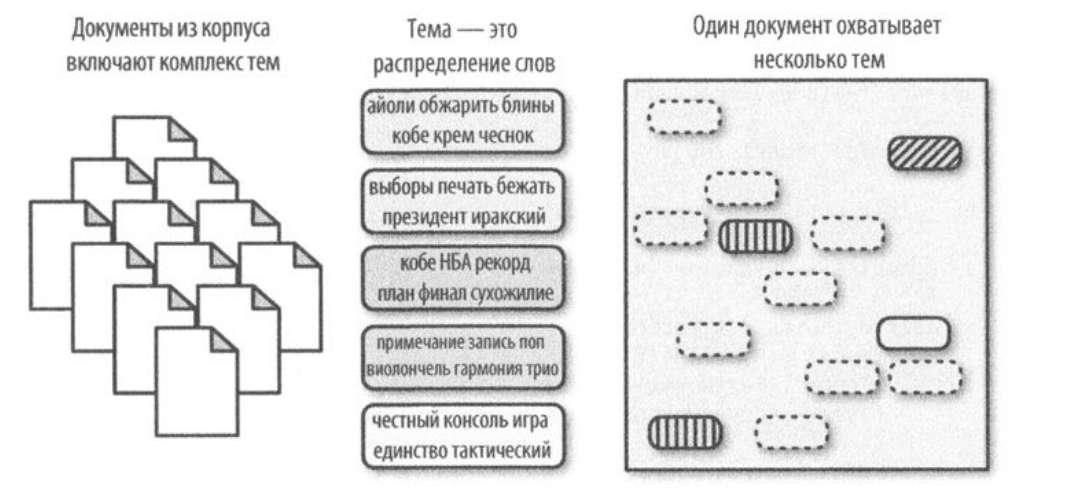

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
X, _ = make_multilabel_classification(random_state=0)
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

LatentDirichletAllocation(...)
# get topics for some given samples:
lda.transform(X[-2:])

array([[0.00360392, 0.25499205, 0.0036211 , 0.64236448, 0.09541846],
       [0.15297572, 0.00362644, 0.44412786, 0.39568399, 0.003586  ]])